# **Import librareis**

In [1]:
import numpy as np
import pylab as pl
import networkx as nx


# **Define The Graph**

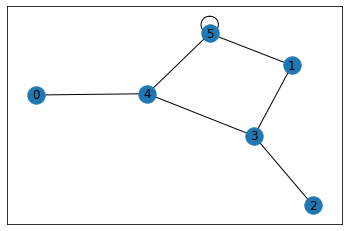

In [2]:
edges = [(0,4),(4,0),(1,3),(3,1),(1,5),(5,1),(2,3),(3,2),(3,4),(4,3),(4,5),(5,4),(5,5)]
# A=0, B=1 C=2 D=3 E=4 F=5
goal = 5
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
pl.show()
# the maze is just a graph with a lot of nodes so we defined a graph that represnt the maze 
# the draw function is not for the maze and this is just a random plot of the maze this is what the function do 

# **Inisialize The Reward tabel**

In [3]:
MATRIX_SIZE = 6
R = np.matrix(np.ones(shape =(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

for point in edges:
  if point[1] == goal:
    R[point] = 100
  else:
   R[point] = 0

  if point[0] == goal:
   R[point[::-1]] = 100
  else:
   R[point[::-1]]= 0

R[goal, goal]= 100
print(R)
#each edge in the graph will have the value 0 in the reward table , each edge that is connected to the goal node will have the value 100 otherwise -1 

[[ -1.  -1.  -1.  -1.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1. 100.]
 [ -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.   0.  -1.   0.  -1.]
 [  0.  -1.  -1.   0.  -1. 100.]
 [ -1.   0.  -1.  -1.   0. 100.]]


# **Inisialize The Q-tabel**

In [4]:
Q = np.matrix(np.zeros(shape =(MATRIX_SIZE, MATRIX_SIZE)))
print(Q)
# the Q-table will have the same size as the reward tabel but all the  values in it will start with zero , it will be updated later 

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


# **Q-Learning Alg. Functions**

In [5]:
#define a vallue of Y
Y=0.8


# Function to find all the available moves for the current state
def available_moves(state):
  current_state_row = R[state, ]
  available_move = np.where(current_state_row >= 0)[1]
  return available_move



# function to Select next state by random (S)

def rand_next_move(available_move_range):
  next_move = int(np.random.choice(available_move, 1))
  return next_move


# Updates the Q-table according to the path chosen
def update(init_state, next_move, Y):

  max_index = np.where(Q[next_move, ] == np.max(Q[next_move, ]))[1]
  if max_index.shape[0] > 1:
   max_index = int(np.random.choice(max_index, size = 1))
  else:
   max_index = int(max_index)
  max_value = Q[next_move, max_index]
  Q[init_state, next_move] = R[init_state, next_move] + Y * max_value
  if (np.max(Q) > 0):
   return(np.sum(Q / np.max(Q)*100))
  else:
    return (0)

# **Q-Learning Alg. steps**

In [6]:
# now we will use all the functions that we wrote several times, i used 1500 itarations for the loop which is a big number because it's a small graph it it's so fast so there is no harm
scores = []
for i in range(2000):
  current_state = np.random.randint(0, int(Q.shape[0])) #step 1:Select initial sate by random (s)
  available_move = available_moves(current_state)       #get the available moves
  next_move = rand_next_move(available_move)            #randomly choose the next move from the available moves
  score = update(current_state, next_move, Y)           #update the q-table scores 
  scores.append(score)                               

  




# **Testing**

In [16]:
# test the best solution from any state to the goal 
#some times we reach an infinte loop it's not a problem in the code just run the above code again and it will work (because it's random sometimes some nodes will not be counted )
print(Q)

for i in range (5):
  current_state = i
  steps = [current_state]
  while current_state != 5:

    next_step_index = np.where(Q[current_state, ] == np.max(Q[current_state, ]))[1]
    if next_step_index.shape[0] > 1:
      next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
      next_step_index = int(next_step_index)
      steps.append(next_step_index)
      current_state = next_step_index

  print("Most efficient path:")
  print(steps)

[[  0.           0.           0.           0.         399.99999957
    0.        ]
 [  0.           0.           0.         319.99999957   0.
  499.99999947]
 [  0.           0.           0.         319.99999966   0.
    0.        ]
 [  0.         399.99999947 255.99999947   0.         399.99999957
    0.        ]
 [319.99999966   0.           0.         319.99999933   0.
  499.99999947]
 [  0.         399.99999957   0.           0.         399.99999957
  499.99999933]]
Most efficient path:
[0, 4, 5]
Most efficient path:
[1, 5]
Most efficient path:
[2, 3, 4, 5]
Most efficient path:
[3, 4, 5]
Most efficient path:
[4, 5]
